<a href="https://colab.research.google.com/github/dkopczyk/ScriptDump/blob/main/Focus_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

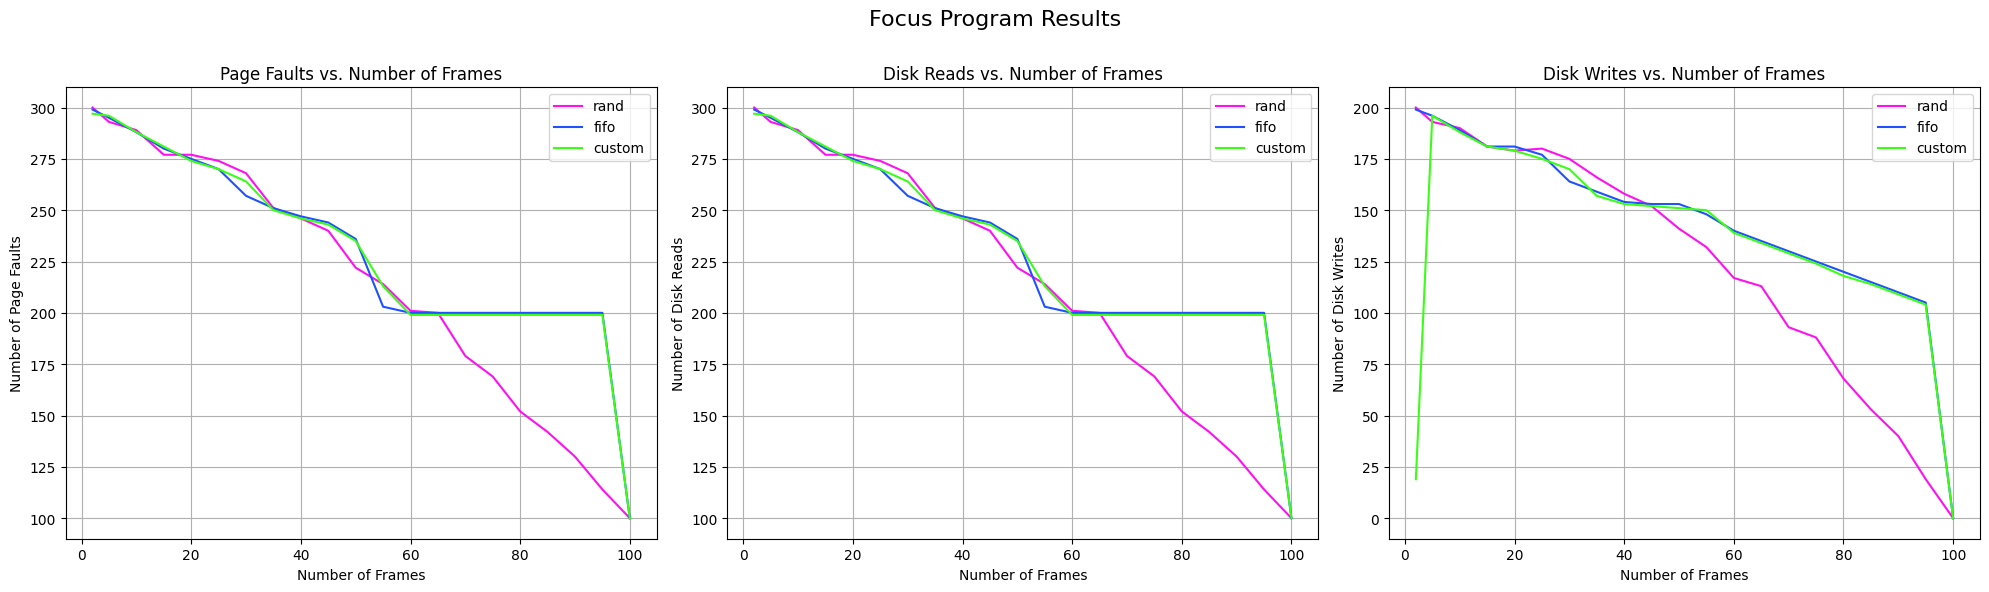

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

data = """
rand,100,100,100,100,0
rand,100,95,114,114,19
rand,100,90,130,130,40
rand,100,85,142,142,53
rand,100,80,152,152,68
rand,100,75,169,169,88
rand,100,70,179,179,93
rand,100,65,200,200,113
rand,100,60,201,201,117
rand,100,55,214,214,132
rand,100,50,222,222,141
rand,100,45,240,240,152
rand,100,40,246,246,158
rand,100,35,251,251,166
rand,100,30,268,268,175
rand,100,25,274,274,180
rand,100,20,277,277,179
rand,100,15,277,277,181
rand,100,10,289,289,190
rand,100,5,293,293,193
rand,100,2,300,300,200
fifo,100,100,100,100,0
fifo,100,95,200,200,105
fifo,100,90,200,200,110
fifo,100,85,200,200,115
fifo,100,80,200,200,120
fifo,100,75,200,200,125
fifo,100,70,200,200,130
fifo,100,65,200,200,135
fifo,100,60,200,200,140
fifo,100,55,203,203,148
fifo,100,50,236,236,153
fifo,100,45,244,244,153
fifo,100,40,247,247,154
fifo,100,35,251,251,159
fifo,100,30,257,257,164
fifo,100,25,270,270,177
fifo,100,20,275,275,181
fifo,100,15,280,280,181
fifo,100,10,288,288,189
fifo,100,5,295,295,196
fifo,100,2,299,299,199
custom,100,100,100,100,0
custom,100,95,199,199,104
custom,100,90,199,199,109
custom,100,85,199,199,114
custom,100,80,199,199,118
custom,100,75,199,199,124
custom,100,70,199,199,129
custom,100,65,199,199,134
custom,100,60,199,199,139
custom,100,55,213,213,150
custom,100,50,235,235,151
custom,100,45,243,243,152
custom,100,40,246,246,153
custom,100,35,250,250,157
custom,100,30,264,264,170
custom,100,25,270,270,175
custom,100,20,274,274,179
custom,100,15,281,281,181
custom,100,10,288,288,188
custom,100,5,296,296,196
custom,100,2,297,297,19
"""

columns = ['algorithm', 'pages', 'frames', 'page_faults', 'disk_reads', 'disk_writes']
df = pd.read_csv(StringIO(data), names=columns, header=None)

def create_graph(ax, data, x_col, ylabel, title, legend_labels):
    colors = iter(['#FF10F0', '#1F51FF', '#39FF14'])

    for algorithm in (data.iloc[:, 0]).unique():
        # print("hiiii")
        # print(data)
        subset = data[data['algorithm'] == algorithm]
        ax.plot(subset[x_col], subset[ylabel], label=algorithm, color=next(colors))

    ax.set_xlabel('Number of Frames')

    # THIS IS HACKY, SORRY
    if ylabel == 'disk_writes':
        ax.set_ylabel('Number of Disk Writes')
    elif ylabel == 'disk_reads':
        ax.set_ylabel('Number of Disk Reads')
    elif ylabel == 'page_faults':
        ax.set_ylabel('Number of Page Faults')

    ax.set_title(title)
    ax.legend(labels=legend_labels)
    ax.grid(True)


# Create a single figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Page Faults Graph
create_graph(axes[0], df, 'frames', 'page_faults', 'Page Faults vs. Number of Frames', ['rand', 'fifo', 'custom'])

# Disk Reads Graph
create_graph(axes[1], df, 'frames', 'disk_reads', 'Disk Reads vs. Number of Frames', ['rand', 'fifo', 'custom'])

# Disk Writes Graph
create_graph(axes[2], df, 'frames', 'disk_writes', 'Disk Writes vs. Number of Frames', ['rand', 'fifo', 'custom'])

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Set a common title for all subplots
plt.suptitle('Focus Program Results', fontsize=16)

# Show the plots
plt.show()